In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 35)

# Data preparation

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data preprocessing

### Drop customerID and gender columns as they are irrelevant for the model

In [4]:
data = data.drop(['customerID'], axis=1)
data = data.drop(['gender'], axis=1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Convert columns with Yes/No values to True/False

In [5]:
data['Partner'] = data.Partner.eq('Yes')
data['Dependents'] = data.Dependents.eq('Yes')
data['PhoneService'] = data.PhoneService.eq('Yes')
data['MultipleLines'] = data.MultipleLines.eq('Yes')
data['OnlineSecurity'] = data.OnlineSecurity.eq('Yes')
data['OnlineBackup'] = data.OnlineBackup.eq('Yes')
data['DeviceProtection'] = data.DeviceProtection.eq('Yes')
data['TechSupport'] = data.TechSupport.eq('Yes')
data['StreamingTV'] = data.StreamingTV.eq('Yes')
data['StreamingMovies'] = data.StreamingMovies.eq('Yes')
data['PaperlessBilling'] = data.PaperlessBilling.eq('Yes')
data['Churn'] = data.Churn.eq('Yes')

In [6]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,True,False,1,False,False,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False
1,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.95,1889.5,False
2,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True
3,0,False,False,45,False,False,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False
4,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,True


### One-hot encode InternetService, Contract, PaymentMethod columns

In [7]:
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [8]:
data = data.join(pd.get_dummies(data['InternetService']).rename(columns={'No': 'NoInternetService'}))
data = data.drop(['InternetService'], axis=1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,NoInternetService
0,0,True,False,1,False,False,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.85,29.85,False,True,False,False
1,0,False,False,34,True,False,True,False,True,False,False,False,One year,False,Mailed check,56.95,1889.5,False,True,False,False
2,0,False,False,2,True,False,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.85,108.15,True,True,False,False
3,0,False,False,45,False,False,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.30,1840.75,False,True,False,False
4,0,False,False,2,True,False,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.70,151.65,True,False,True,False


In [9]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [10]:
data = data.join(pd.get_dummies(data['Contract']))
data = data.drop(['Contract'], axis=1)

data = data.join(pd.get_dummies(data['PaymentMethod']))
data = data.drop(['PaymentMethod'], axis=1)
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,NoInternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,True,False,1,False,False,False,True,False,False,False,False,True,29.85,29.85,False,True,False,False,True,False,False,False,False,True,False
1,0,False,False,34,True,False,True,False,True,False,False,False,False,56.95,1889.5,False,True,False,False,False,True,False,False,False,False,True
2,0,False,False,2,True,False,True,True,False,False,False,False,True,53.85,108.15,True,True,False,False,True,False,False,False,False,False,True
3,0,False,False,45,False,False,True,False,True,True,False,False,False,42.30,1840.75,False,True,False,False,False,True,False,True,False,False,False
4,0,False,False,2,True,False,False,False,False,False,False,False,True,70.70,151.65,True,False,True,False,True,False,False,False,False,True,False


### Convert TotalCharges column to numeric

In [11]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0)
data['TotalCharges'] = data['TotalCharges'].apply(pd.to_numeric)

### Feature correlation heatmap

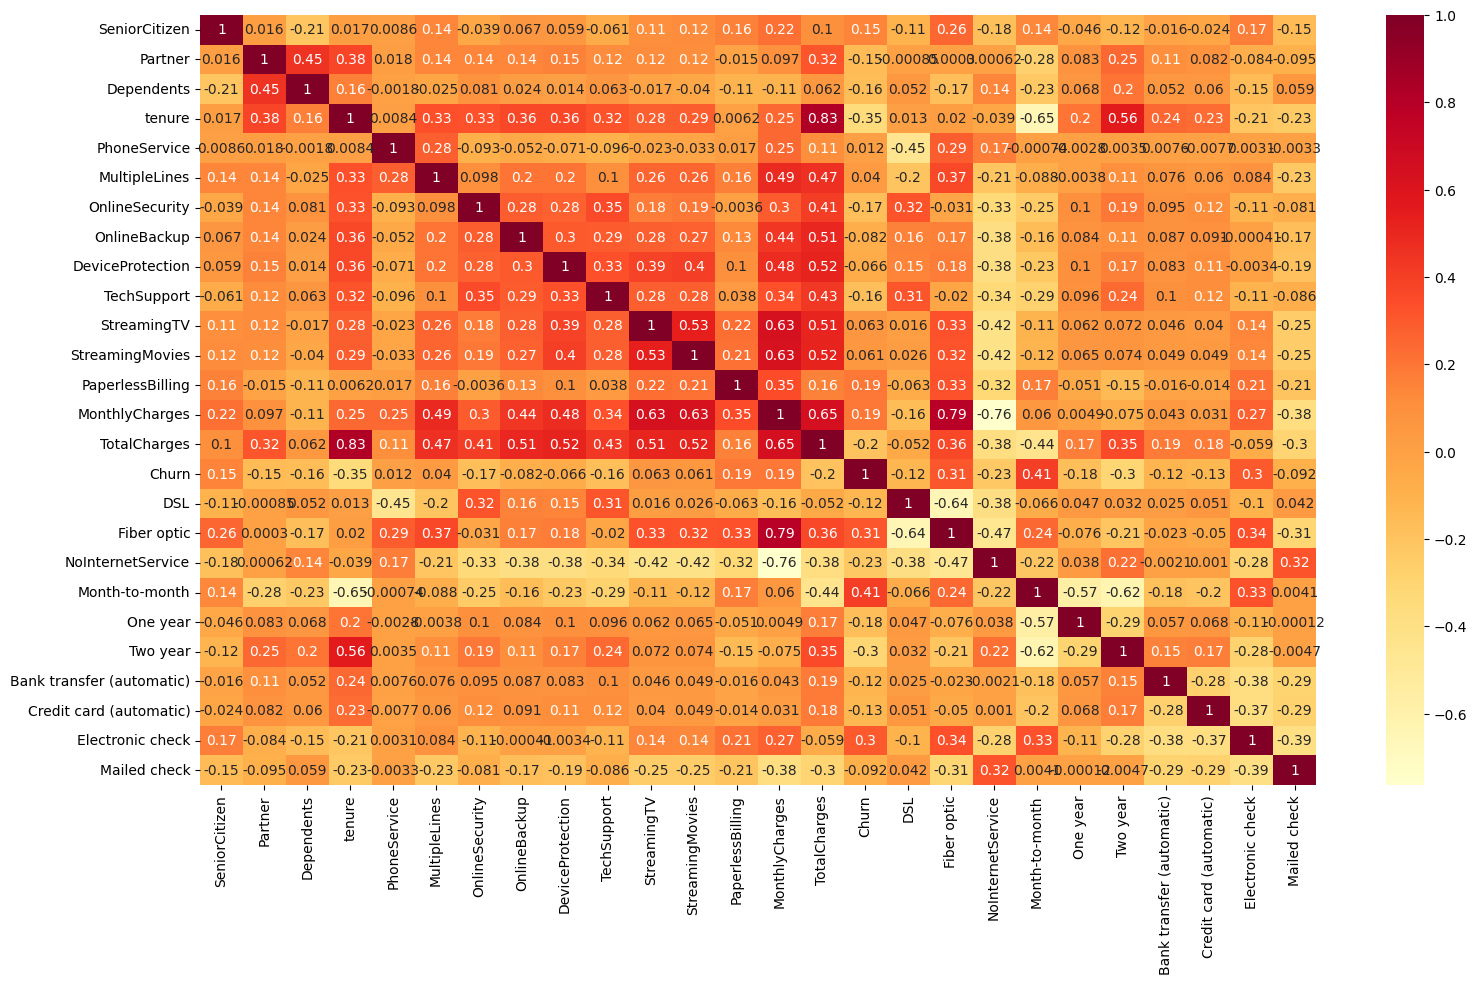

In [12]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlOrRd')
plt.show()

### Data splitting

In [13]:
X, y = data.drop(['Churn'], axis=1), data['Churn']
X.head(), y.head()

(   SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
 0              0     True       False       1         False          False   
 1              0    False       False      34          True          False   
 2              0    False       False       2          True          False   
 3              0    False       False      45         False          False   
 4              0    False       False       2          True          False   
 
    OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
 0           False          True             False        False        False   
 1            True         False              True        False        False   
 2            True          True             False        False        False   
 3            True         False              True         True        False   
 4           False         False             False        False        False   
 
    StreamingMovies  PaperlessBilling  Mon

### Split the data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

### Scale the data

In [15]:
from sklearn.preprocessing import StandardScaler

COLUMNS_TO_SCALE = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[COLUMNS_TO_SCALE])
X_test_scaled = scaler.transform(X_test[COLUMNS_TO_SCALE])

X_train[COLUMNS_TO_SCALE] = X_train_scaled
X_test[COLUMNS_TO_SCALE] = X_test_scaled

X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,DSL,Fiber optic,NoInternetService,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
2570,0,True,False,-0.103573,True,True,False,False,False,False,True,True,True,0.968733,0.253452,False,True,False,True,False,False,False,True,False,False
5816,0,False,False,-1.205036,True,False,False,False,False,False,False,False,False,-0.681093,-0.960094,True,False,False,True,False,False,False,False,True,False
1090,0,False,False,0.753120,True,True,True,True,True,False,True,True,False,1.415804,1.498269,False,True,False,False,True,False,True,False,False,False
4750,0,False,False,-0.960266,False,False,True,True,True,False,False,False,False,-0.849578,-0.849388,True,False,False,False,True,False,False,False,False,True
1475,1,True,False,1.487429,True,True,False,True,False,True,True,True,False,1.347409,2.081236,False,True,False,False,False,True,False,True,False,False


### Splitting the data

In [16]:
X = data.drop(['Churn'], axis=1)
y = data['Churn']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model building

## Support Vector Machine (SVM) model

### Model training

In [18]:
from sklearn.svm import SVC

svc = SVC(random_state=13)

svc.fit(X_train, y_train)

SVC(random_state=13)

### Model evaluation

In [19]:
svc.score(X_test, y_test)

0.730305180979418

## Decision Tree model

### Model training

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=13)

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

### Model evaluation

In [21]:
tree.score(X_test, y_test)

0.7281760113555713

## Random Forest model

### Model training

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=13)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

### Model evaluation

In [23]:
forest.score(X_test, y_test)

0.7799858055358411

## Gradient Boosting model

### Model training

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(random_state=13)

gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=13)

### Model evaluation

In [25]:
gradient_boosting.score(X_test, y_test)

0.801277501774308

## XGBoost model

### Model training

In [88]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=13, n_estimators=100, max_depth=100, early_stopping_rounds=5)

xgb_classifier.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=10)

[0]	validation_0-logloss:0.51666
[10]	validation_0-logloss:0.47070


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=13, ...)

### Model evaluation

In [89]:
xgb_classifier.score(X_test, y_test)

0.7927608232789212

# Hyperparameter tuning the most promising model (Gradeint Boost model)

## Grid search for hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

gradient_boosting = GradientBoostingClassifier(random_state=13)

gb_grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, n_jobs=-1, scoring='accuracy')

gb_grid_search.fit(X_test, y_test)

best_gb_model = gb_grid_search.best_estimator_

In [29]:
best_gb_model

GradientBoostingClassifier(n_estimators=50, random_state=13)

## Evaluation of the model with the best hyperparameters

In [30]:
best_gb_model.score(X_test, y_test)

0.8353442157558553

## Confusion matrix of the best model

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = best_gb_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[957,  72],
       [160, 220]], dtype=int64)

# Neural Network model

## Prepare the data for the neural network

### Convert data to torch TensorDataset

In [40]:
import torch
from torch.utils.data import TensorDataset

train_data = TensorDataset(torch.from_numpy(X_train.to_numpy(dtype=np.float32)), torch.from_numpy(y_train.to_numpy(dtype=np.longlong)))
test_data = TensorDataset(torch.from_numpy(X_test.to_numpy(dtype=np.float32)), torch.from_numpy(y_test.to_numpy(dtype=np.longlong)))

### Data loaders

In [41]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

## Neural network model

### Build the model

In [53]:
from net import NeuralNet

IN_FEATURES = len(X.columns)
OUT_FEATURES = 2
model = NeuralNet(IN_FEATURES, OUT_FEATURES)

### Model training

In [54]:
model.fit(train_dataloader, n_epochs=10, lr=1e-4)

Epoch: 1/10:
loss: 241.4449005126953
loss: 145.62448120117188
loss: 130.80194091796875
loss: 184.95433044433594
loss: 92.14204406738281
loss: 69.27796936035156
loss: 49.011375427246094
loss: 23.76238250732422
Epoch: 2/10:
loss: 3.980555295944214
loss: 2.6510355472564697
loss: 3.4518911838531494
loss: 1.7949711084365845
loss: 0.6100215911865234
loss: 0.7551186084747314
loss: 0.5897476077079773
loss: 0.5362564325332642
Epoch: 3/10:
loss: 0.5870439410209656
loss: 0.6332961916923523
loss: 0.4710080325603485
loss: 0.5025366544723511
loss: 0.5632410049438477
loss: 0.5077629089355469
loss: 0.5251293778419495
loss: 0.4928494989871979
Epoch: 4/10:
loss: 0.5001010894775391
loss: 0.5084651708602905
loss: 0.6130191683769226
loss: 0.43855005502700806
loss: 0.4912793040275574
loss: 0.5605809092521667
loss: 0.5428025722503662
loss: 0.6368315815925598
Epoch: 5/10:
loss: 0.5516586899757385
loss: 0.4725648760795593
loss: 0.5256549715995789
loss: 0.5694963335990906
loss: 0.48639753460884094
loss: 0.50408

### Model evaluation

In [55]:
model.score(test_dataloader)

0.7849538679914834